In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from suport import download, load_json

%matplotlib inline

In [2]:
stocks_path = 'jsons/stocks.json'
metrics_path = 'jsons/metrics/{}.json'
balance_path = 'jsons/balance/{}.json'
valuation_path = 'jsons/valuation/{}.json'

# Dados

Todos os dados foram encontrados no site https://financialmodelingprep.com/ que tem uma api simples e com bastante dados.
Os passos a seguir são:

- 1 - Baixar a lista de todas as ações (https://financialmodelingprep.com/api/v3/company/stock/list)
- 2 - Baixar todas as métricas das ações por quarter (https://financialmodelingprep.com/api/v3/company-key-metrics/{}?period=quarter)
- 3 - Baixar dados de balanço das ações por quarter (https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/{}?period=quarter)
- 4 - Baixar dados de valor de mercado da empresa por quarter (https://financialmodelingprep.com/api/v3/enterprise-value/{}?period=quarter)


Para fazer isso e não sujar muito o notebook eu criei um .py para auxiliar nessa tarefa e outras...

In [3]:
#Insira True para forçar o download de todos os dados novamente, False só irá baixar o que não tem salvo
download(False) 

Download SPY index 0 ...
Download BZUN index 1000 ...
Download APAM index 2000 ...
Download ARLZ index 3000 ...
Download FM index 4000 ...
Download CHA index 5000 ...
Download DDT index 6000 ...
Download MFO index 7000 ...
Download CVIA index 8000 ...
Download MLCLP.PA index 9000 ...
Download ZEO.TO index 10000 ...
Download FLRAX index 11000 ...
Download SGIIX index 12000 ...
Download XBIOW index 13000 ...
Download PSHG index 14000 ...


In [29]:
stocks = load_json(stocks_path)['symbolsList']

In [30]:
metrics_2020 = []
for i in range(7000):
    stock = stocks[i]
    metrics = load_json(metrics_path.format(stock['symbol']))
    
    if len(metrics) > 0 and '2020' in metrics[0]['date']:
        metrics_2020.append({ 'symbol': stock['symbol'], 'metrics': metrics})

# 1. Value Investing

Em resumo, as empresas tem um valor intrínseco, que costuma crescer ao longo do tempo se é uma boa empresa. Mas em alguns momentos, seja por crises ou eventos que impactam os mercados, algumas empresas podem se descolar do seu valor intrínseco.
Nesses momento é dito que tais empresas estão com desconto, em relação ao seu valor intrínseco (VI). O VI será um dos critérios na escolha das ações americanas. Mas existem sub-grupos dentro do Value Investing. 


### 1.1 Deep Value Investing

São ações abaixo do valor de liquidação. O valor de Liquidação é são os ativos (caixa, estoques, contas a receber e imobilizados... terrenos e etc...) menos passivos (dividas longo e curto prazo.. fornecedores). É importante aqui considerar um certo nível de inadimplência nas contas a receber.

Comparando esse valor de liquidação com o valor atual de mercado, essa ação está com desconto? 

Se sim, é uma boa ação para comprar usando apenas esse critério.

Porém existem armadilhas, existem empresas que por anos consecutivos estão abaixo do seu valor de liquidação. O intuito é achar exatamente ações que eventualmente caiu nessa situação.

### 1.2 High Quality Investing

Empresas que geram retorno sobre capital elevado. A ideia aqui é buscar ativos focando na qualidade dos ativos. São parametros que indicam qualidade de um ativo.

- Margens elevadas e estáveis
- Alta rentabilidade
- Forte geração de caixa
- Baixo endividamento
- Crescimento
- Gestão competente

Referências
- https://comoinvestir.thecap.com.br/o-que-e-value-investing/
- https://www.youtube.com/watch?v=7I2W57K13WM

In [33]:
stock = metrics_2020[0]
x = []
y = []
stock

{'symbol': 'KMI',
 'metrics': [{'date': '2020-03-31',
   'Revenue per Share': '1.3719081272084805',
   'Net Income per Share': '-0.1351590106007067',
   'Operating Cash Flow per Share': '0.39443462897526504',
   'Free Cash Flow per Share': '0.20008833922261485',
   'Cash per Share': '0.15901060070671377',
   'Book Value per Share': '14.62279151943463',
   'Tangible Book Value per Share': '22.112632508833922',
   'Shareholders Equity per Share': '14.62279151943463',
   'Interest Debt per Share': '15.435070671378092',
   'Market Cap': '3.439016E10',
   'Enterprise Value': '6.897516E10',
   'PE ratio': '-112.38614379084967',
   'Price to Sales Ratio': '11.07216999356085',
   'POCF ratio': '38.51081746920492',
   'PFCF ratio': '75.91646799116998',
   'PB ratio': '1.0387893433214521',
   'PTB ratio': '1.0387893433214521',
   'EV to Sales': '22.20707018673535',
   'Enterprise Value over EBITDA': '107.7736875',
   'EV to Operating cash flow': '77.23982082866742',
   'EV to Free cash flow': '1

In [23]:
for m in stock['metrics']:
    x.append(m['date'])
    y.append(m['Net Income per Share'])

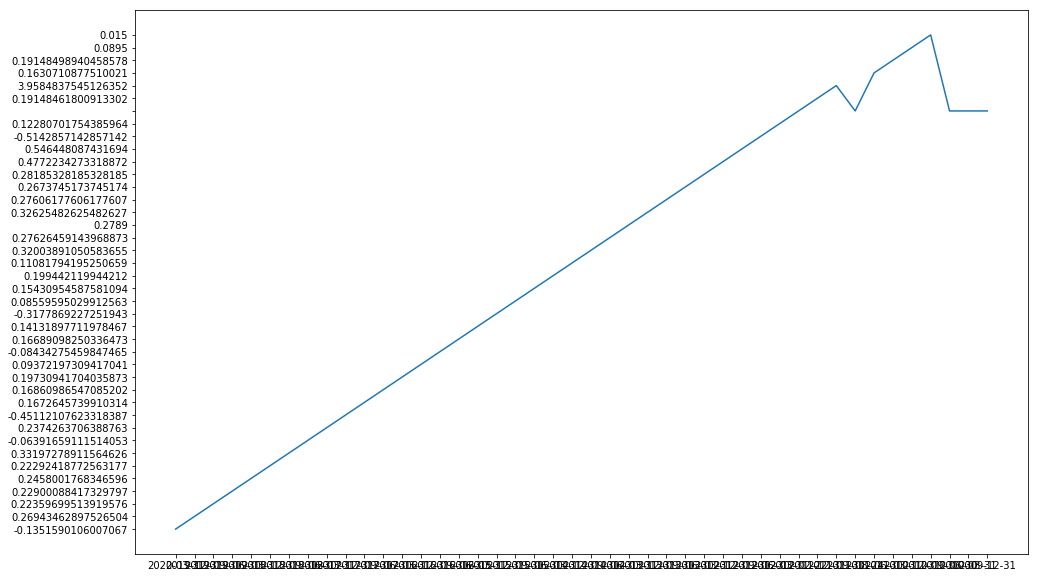

In [27]:
plt.rcParams['figure.figsize'] = (16,10)
fig,ax = plt.subplots()
ax.plot(x, y)
plt.show()